In [1]:
# Import and setup
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
%matplotlib inline

### Read data from file

In [2]:
# Define file path
file_train = 'train_V2.csv'

In [3]:
# Define method to read data, providing abilities to subsample and read by chunks
def read_data(file_path, n_rows=None, chunk_size=None, smpl_rate=1):
    
    def sample_data(df, smpl_rate):
        n_samples = int(df.shape[0] * smpl_rate)
        return data.iloc[np.random.choice(df.shape[0], n_samples, replace=False)]
    
    data = pd.read_csv(file_path, nrows=n_rows, chunksize=chunk_size)
    if chunk_size is not None:
        data = pd.concat([chunk for chunk in data])
        
    return sample_data(data, smpl_rate)

In [4]:
# Read data from file
data = read_data(file_train)
data.shape

(4446966, 29)

In [5]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1587522,85b765d213abd3,7b887066d05a1f,778cc8f89d9f18,0,0,0.0,0,0,0,74,1294,0,0,0.0,1511,squad,25,22,-1,0,0.0,0,0.0,0,0,368.9,2,1535,0.1667
434429,d6e8a7eb180956,765e124f129cd0,a5f3aa3a3cf686,0,0,0.0,0,0,0,60,0,0,0,0.0,1302,duo-fpp,48,45,1444,0,0.0,0,0.0,0,0,309.0,4,0,0.4043
4363270,06ad308e01fcc1,77274216a75fe9,52b92e7fb39660,1,0,242.4,2,0,2,38,1336,1,1,18.3,1902,squad-fpp,28,28,-1,1,2717.0,0,0.0,0,0,1071.0,4,1453,0.4815
3368572,f0c73d7092cea1,bcf54c2a91ebed,75f268b3589296,0,0,0.0,0,0,1,80,0,0,0,0.0,1934,duo-fpp,45,43,1500,0,0.0,0,0.0,0,0,182.0,3,0,0.0909
245788,6745562ad69731,b0e0b356659b0c,5d879677f7fc55,0,3,320.1,2,0,0,11,1191,2,2,170.3,1880,duo-fpp,46,45,-1,0,1563.0,0,370.0,0,0,2797.0,5,1411,0.8889


### Examine missing values

In [6]:
# Show the number of NAN fields
data.isnull().sum(axis=0)

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [6]:
# Drop the row with null winPlacePerc
data = data.dropna()
data.shape

(4446965, 29)

### Show data description

In [8]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.338150e-01,1.106908e+00,1.307172e+02,6.578757e-01,2.268196e-01,1.370148e+00,4.759936e+01,5.050062e+02,9.247835e-01,5.439553e-01,2.299760e+01,1.579507e+03,4.450468e+01,4.300760e+01,8.920103e+02,1.646590e-01,6.061158e+02,3.496092e-03,4.509323e+00,2.386841e-02,7.918209e-03,1.154218e+03,3.660488e+00,6.064603e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746293e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587388e+02,2.382810e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261158e-02,1.183497e+03,2.456543e+00,7.397005e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.330000e+02,2.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.910000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


There are four features (not shown in the description) with string type: Id, groupId, matchId, matchType. These four types will be handled separately.

All features in the description have values in a valid range.

Last things to notice is:
* rankPoints (external ranking of players) has at least 25% but no more than 50% samples with value $-1$ which means "None".
* killPoints and winPoints (external kill/win based ranking of players): if there is a value other than $-1$ in rankPoints, then any 0 in killPoints and winPoints should be treated as "None".

Explore rankPoints.

In [23]:
# Show all negative values
data.loc[data['rankPoints'] < -0.01]['rankPoints'].unique()

array([-1])

The only negative value of rankPoints is $-1$ (None).

The min for killPoints and winPoints is $0$. Explore killPoints and winPoints when rankPoints = $-1$.

In [28]:
data.loc[(data['rankPoints'] == -1) & (data['killPoints'] == 0)]['killPoints']

Series([], Name: killPoints, dtype: int64)

In [29]:
data.loc[(data['rankPoints'] == -1) & (data['winPoints'] == 0)]['winPoints']

Series([], Name: winPoints, dtype: int64)

We can see that when rankPoints is $-1$ (None), killPoints and winPoints have values $> 0$ (non-None).

This means all "None" killPoints and winPoints must have "non-None" rankPoints.

### Deal with "None" values

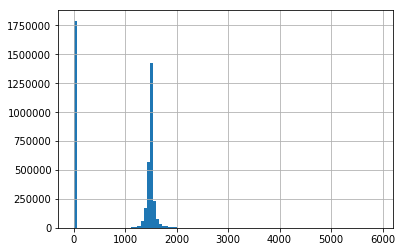

In [31]:
# Show histogram of rankPoints
data['rankPoints'].hist(bins=100)

Non-none values of rankPoints follow normal distribution approximately. Replace all None value ($-1$) with mean later.

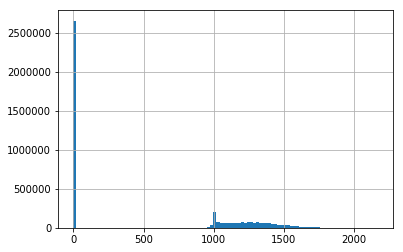

In [32]:
# Show histogram of killPoints
data['killPoints'].hist(bins=100)

Replace all None value ($0$) of killPoints with its mean later.

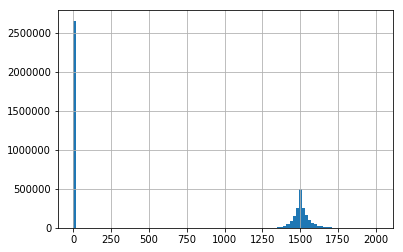

In [33]:
# Show histogram of winPoints
data['winPoints'].hist(bins=100)

Non-none values of winPoints follow normal distribution approximately. Replace all None value ($0$) of winPoints with its mean later.

The mean of non-none rankPoints is 1494.341


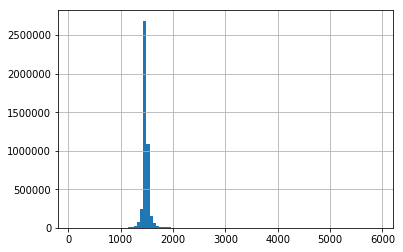

In [6]:
# Replace None values of rankPoints with mean
col_rankpoints = data['rankPoints']
col_rankpoints = col_rankpoints.loc[col_rankpoints > 1e-4]
mean_rankpoints = col_rankpoints.mean()
print('The mean of non-none rankPoints is %.3f' % mean_rankpoints)

data.loc[data['rankPoints'] < 1e-4, 'rankPoints'] = mean_rankpoints
col_rankpoints = None

data['rankPoints'].hist(bins=100)

The mean of non-none killPoints is 1253.682


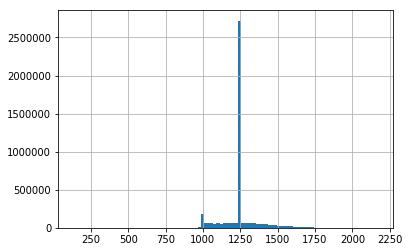

In [7]:
# Replace None values of killPoints with mean
col_killpoints = data['killPoints']
col_killpoints = col_killpoints.loc[col_killpoints > 1e-4]
mean_killpoints = col_killpoints.mean()
print('The mean of non-none killPoints is %.3f' % mean_killpoints)

data.loc[data['killPoints'] < 1e-4, 'killPoints'] = mean_killpoints
col_killpoints = None

data['killPoints'].hist(bins=100)

The mean of non-none winPoints is 1505.543


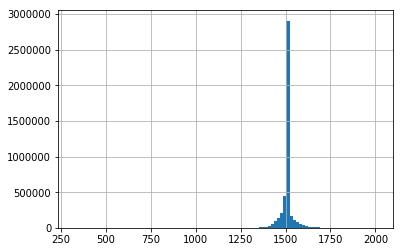

In [8]:
# Replace None values of winPoints with mean
col_winpoints = data['winPoints']
col_winpoints = col_winpoints.loc[col_winpoints > 1e-4]
mean_winpoints = col_winpoints.mean()
print('The mean of non-none winPoints is %.3f' % mean_winpoints)

data.loc[data['winPoints'] < 1e-4, 'winPoints'] = mean_winpoints
col_winpoints = None

data['winPoints'].hist(bins=100)

### Show feature correlation

In [12]:
data.corr().abs()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,0.290062,9.451609e-02,0.319690,0.243471,0.261425,0.019450,0.147916,0.146804,4.389389e-02,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290306,0.243882,5.819333e-02,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,0.554844,1.078905e-01,0.502024,0.405327,0.423290,0.072108,0.013686,0.012929,1.043964e-01,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,9.816399e-02,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,0.677398,1.880490e-01,0.888783,0.703599,0.563837,0.006755,0.040707,0.040078,1.183429e-01,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353249,8.737118e-02,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,0.555289,1.781333e-01,0.707848,0.646872,0.451422,0.014485,0.267709,0.265788,3.977014e-02,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,6.623312e-02,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199918,0.469829,1.094795e-01,0.674275,0.512882,0.447261,0.017657,0.009211,0.009389,7.763533e-02,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,4.749784e-02,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199918,1.000000,0.386032,5.943629e-02,0.311781,0.270412,0.263278,0.108901,0.064759,0.064204,4.753530e-02,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,6.323038e-02,0.427857
killPlace,0.290062,0.554844,0.677398,0.555289,0.469829,0.386032,1.000000,1.373719e-01,0.730498,0.810516,0.541146,0.005804,0.016792,0.018786,1.128661e-01,0.269804,0.236202,0.057356,0.089396,0.037797,0.073569,0.590236,0.490143,1.124570e-01,0.719069
killPoints,0.094516,0.107891,0.188049,0.178133,0.109479,0.059436,0.137372,1.000000e+00,0.169030,0.163695,0.111195,0.064203,0.078333,0.074253,3.145825e-20,0.057149,0.010443,0.005122,0.005222,0.002887,0.011189,0.065816,0.024951,4.446515e-01,0.071627
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,0.730498,1.690302e-01,1.000000,0.802500,0.602936,0.030687,0.004847,0.004060,1.139056e-01,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,7.498448e-02,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,0.810516,1.636955e-01,0.802500,1.000000,0.515097,0.034644,0.037338,0.036054,8.435057e-02,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,6.856938e-02,0.377566


Several findings from the correlation matrix:
* numGroups and maxPlace has high correlation $0.99$, which is expected.
* damageDealt, kills, killStreaks, DBNOs have high correlation with each other (around $0.7$ to $0.8$), which is also expected.
* The feature that has highest correlation with target winPlacePerc is **walkDistance**, with score $0.81$.
* The feature that has second highest correlation with target is **killPlace**, with score $0.72$.
* The feature that has third highest correlation with target is **boosts**, with score $0.63$.
* The feature that has fourth highest correlation with target is **weaponsAcquired**, with score $0.58$.
* Other features that also show correlation with target are **damageDealt, heals, kills, longestKill**, with scores around $0.4$ to $0.5$.

### Explore matchType effects

In [17]:
# All match types
data.groupby('matchType').size()

matchType
crashfpp               6287
crashtpp                371
duo                  313591
duo-fpp              996691
flarefpp                718
flaretpp               2505
normal-duo              199
normal-duo-fpp         5489
normal-solo             326
normal-solo-fpp        1682
normal-squad            516
normal-squad-fpp      17174
solo                 181943
solo-fpp             536762
squad                626526
squad-fpp           1756186
dtype: int64

In [21]:
# Confirm individuals of same team have same final placements
data.loc[data['groupId'] == '966a2eee7b49cd']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
440755,054df09bfdae31,966a2eee7b49cd,b555fdfc92cb66,0,0,0.00,0,0,0,80,1253.682174,0,0,0.000,1378,squad,28,27,1508.0,0,0.0,0,0.0,0,0,106.20,2,1505.542888,0.1481
356666,87f5a242d90d5c,966a2eee7b49cd,b555fdfc92cb66,0,0,175.00,2,1,0,35,1253.682174,1,1,2.674,1378,squad,28,27,1516.0,0,0.0,0,0.0,0,0,213.10,2,1505.542888,0.1481
2107704,6825372b4561da,966a2eee7b49cd,b555fdfc92cb66,0,0,60.83,0,0,0,81,1253.682174,0,0,0.000,1378,squad,28,27,1460.0,0,0.0,0,0.0,0,0,56.31,1,1505.542888,0.1481
2589816,2093262d5479b7,966a2eee7b49cd,b555fdfc92cb66,0,0,0.00,0,0,0,79,1253.682174,0,0,0.000,1378,squad,28,27,1457.0,0,0.0,0,0.0,0,0,298.00,2,1505.542888,0.1481


From above we can see that different individuals of same team have same final placements. 

In [22]:
np.linspace(0, 1, 28)

array([0.        , 0.03703704, 0.07407407, 0.11111111, 0.14814815,
       0.18518519, 0.22222222, 0.25925926, 0.2962963 , 0.33333333,
       0.37037037, 0.40740741, 0.44444444, 0.48148148, 0.51851852,
       0.55555556, 0.59259259, 0.62962963, 0.66666667, 0.7037037 ,
       0.74074074, 0.77777778, 0.81481481, 0.85185185, 0.88888889,
       0.92592593, 0.96296296, 1.        ])

In [ ]:
1 // 27 